# Essential utility commands

In [1]:
%pylab notebook
import cv2

Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd

'C:\\Users\\glocsei\\PycharmProjects\\KeyForge_Tracker\\Jupyter_notebooks'

<IPython.core.display.Javascript object>


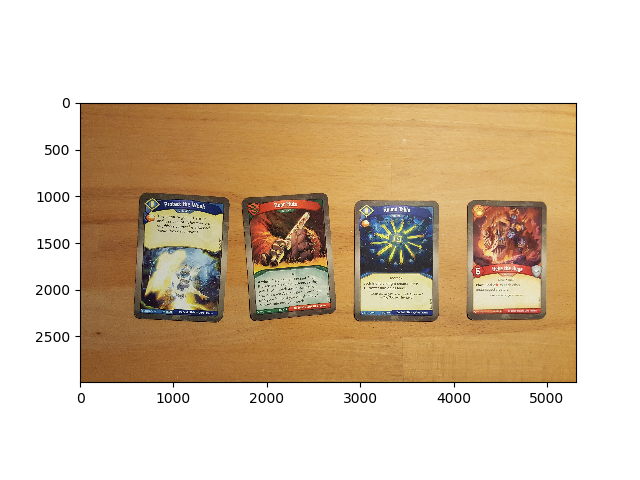

[144  90  56]


In [2]:
# Read image and display using MATPLOTLIB
kfimage = imread('..\\4Cards.jpg')
figure()
imshow(kfimage)
print(kfimage[0][0])

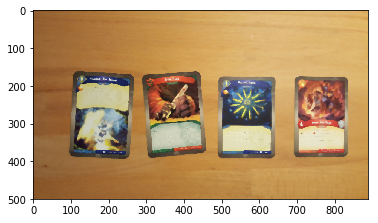

In [5]:
# Downsizing the image
MIN_PER_AXIS = 500 # at least 500 pixels per axis
height, width = kfimage.shape[:2]
scaleFact = MIN_PER_AXIS / min(height,width)
kfresized = cv2.resize(kfimage, None, fx=scaleFact, fy=scaleFact, interpolation=cv2.INTER_CUBIC)
kfresized.shape

# Median filtering preserves edges, but removes noise. Problem is: it's pretty slow, that's why downsizing might help here.
kfmedian = cv2.medianBlur(kfresized,5)

figure()
imshow(kfmedian)

In [21]:
%pylab inline
from ipywidgets import interact

def update(par1,par2):
    # Use CANNY for edge-detection right now. We might want to erode/dilate the mask later on.
    # kfgray = cv2.cvtColor(kfmedian,cv2.COLOR_RGB2GRAY)
    kfcanny = cv2.Canny(kfmedian,par1,par2)
    k_dilate = np.ones((5,5),np.uint8)
    # kfcanny = cv2.dilate(kfcanny,k_dilate,iterations = 1)
    kfcanny = cv2.morphologyEx(kfcanny, cv2.MORPH_CLOSE, k_dilate) # closing means "dilate than erode"

    # Since CANNY returns an NxMx1 array (black&white) we need to convert it into NxMx3
    kfcannyRGB = cv2.cvtColor(kfcanny,cv2.COLOR_GRAY2RGB)

    # Find contours and bouding rectangles on the edge-detected image
    (contours,_) = cv2.findContours(kfcanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Create new image to draw on
    kfedges = kfmedian.copy()

    for mycontour in contours:
        # BOUNDINGRECT: returns bounding rectangle without rotation
        # (x,y,w,h) = cv2.boundingRect(contour)
        # cv2.rectangle(kfmedian, (x,y), (x+w,y+h), (0,255,0), 2)
        # MINAREARECT: returns bounding rectangle with minimal area, i.e. it considers rotation. That's what we need.
        # cv2.minAreaRect() returns a tuple of ((x, y), (w, h), angle)
        rotRect = cv2.minAreaRect(mycontour)
        mybox = cv2.boxPoints(rotRect)
        mybox = numpy.int0(mybox)
        cv2.drawContours(kfedges,[mybox], 0, (0,255,0), 2)
    
    figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
    subplot(1,2,1)
    imshow(kfedges)
    subplot(1,2,2)
    imshow(kfcannyRGB)
    
interact(update,par1=(1,200,10),par2=(1,300,10));

Populating the interactive namespace from numpy and matplotlib


interactive(children=(IntSlider(value=91, description='par1', max=200, min=1, step=10), IntSlider(value=141, d…

<IPython.core.display.Javascript object>


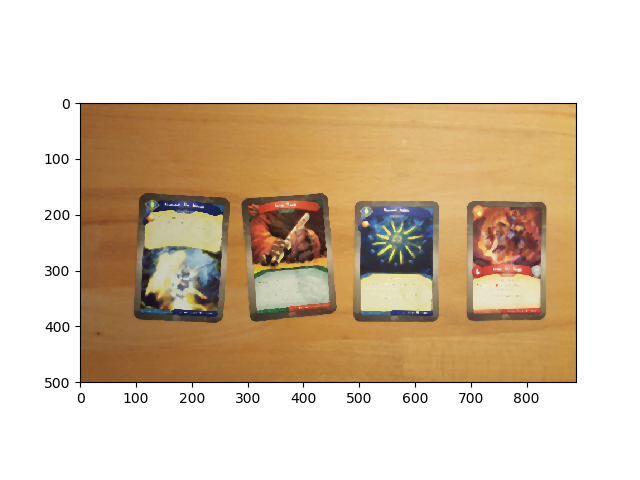

In [125]:
figure()
imshow(kfmedian)

<IPython.core.display.Javascript object>


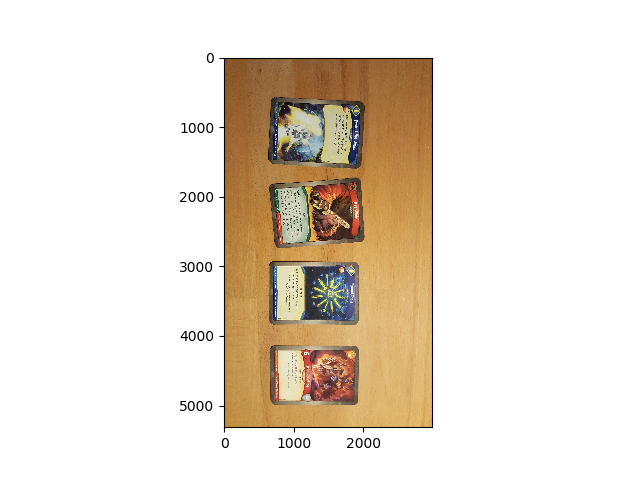

In [33]:
# Read image and display with OpenCV
cv_kfimage = cv2.imread('..\\4Cards.jpg')
# NOTE:
# CV2 uses BGR and MATPLOTLIB uses RGB representation by default
# Display it with MATPLOTLIB:
figure()
imshow(cv2.cvtColor(cv_kfimage,cv2.COLOR_BGR2RGB))
# Display it with CV2:
# cv2.imshow('KFimage',cv_kfimage)
# cv2.waitKey()
# cv2.destroyWindow('KFimage')

<IPython.core.display.Javascript object>


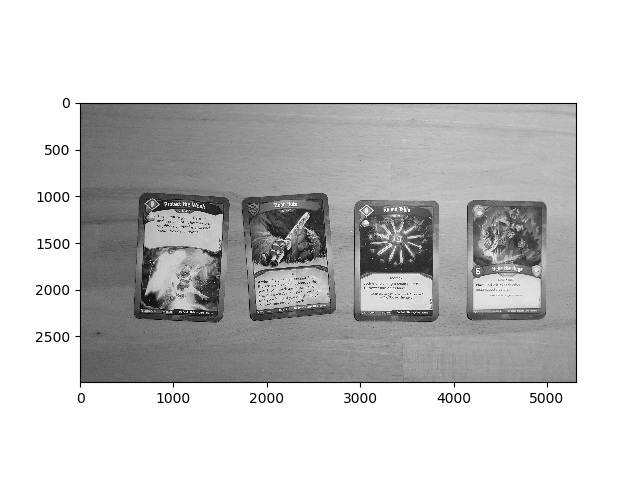

102


In [38]:
# Convert to grayscale
kfgray = cv2.cvtColor(kfimage,cv2.COLOR_RGB2GRAY)
figure()
imshow(kfgray,cmap='gray')
print(kfgray[0][0])

In [40]:
# Convert to floating point representation, as now it's uint8
kfgrayfloat = kfgray.astype(double)/255.0 # map to a range of 0-1